In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
from PIL import Image

In [13]:

image = cv2.imread('woman.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray=cv2.imread('woman.png', cv2.IMREAD_GRAYSCALE)


## **STEP 1 : Test the sobel filter (cv2) on our image**

After reading about how the sobel filter works, I wanted to try it out on our original image. The kernels are always the same for the sobel filter, which we will implement and write in step 2. After generating the two kernels for x and y, we get the magnitude using the gradient magnitude formaula. After normalizing the gradient magnitude to ensure visualization and consistency. A pixel might have a gradient magnitude of 500 (G), and the values for pixels for 8bit images cannot be >255, hence the normalization. 

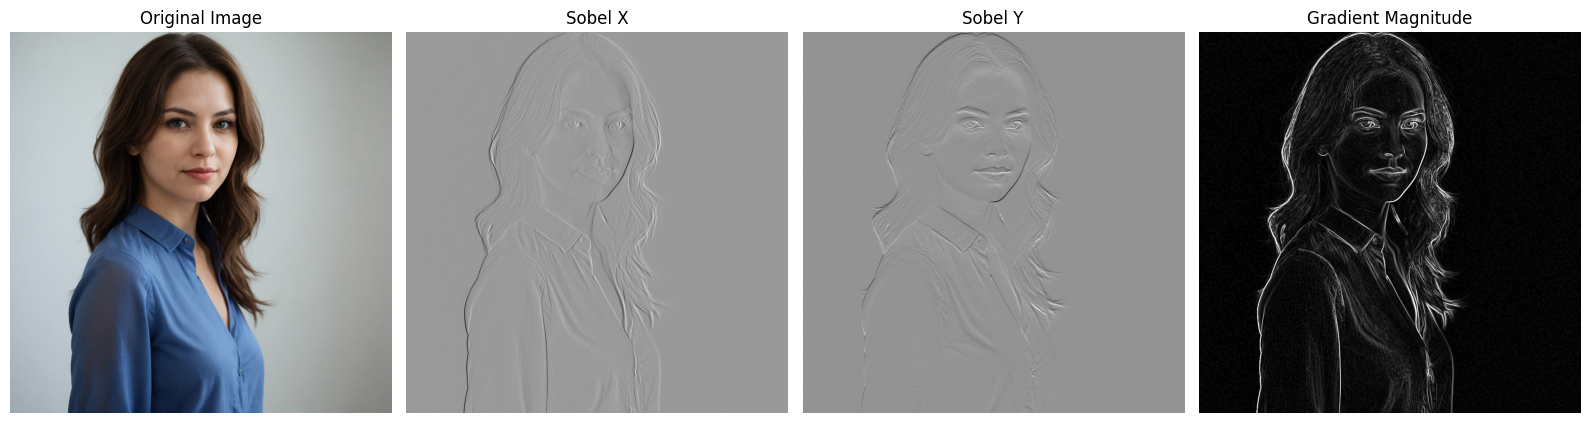

In [18]:
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, dx=1, dy=0, ksize=3)

# Gradient in y direction
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, dx=0, dy=1, ksize=3)

# Compute the gradient magnitude
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize and convert to 8-bit for visualization
sobel_magnitude = cv2.convertScaleAbs(sobel_magnitude)

fig, axes = plt.subplots(1, 4, figsize=(16, 8)) 

#original image displaying
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')  

axes[1].imshow(sobel_x, cmap='gray')
axes[1].set_title("Sobel X")
axes[1].axis('off')  

axes[2].imshow(sobel_y, cmap='gray')
axes[2].set_title("Sobel Y")
axes[2].axis('off') 

axes[3].imshow(sobel_magnitude, cmap='gray')
axes[3].set_title("Gradient Magnitude")
axes[3].axis('off') 

# Show the images
plt.tight_layout()
plt.show()

## **STEP 2 : Generating kernels and more**

For this step, we will implement preliminary variables and pre process the image for the future convolution that we will apply to the image. For the kernel values, please refer to the reference tab. 

We will apply a 3x3 kernel to the image, same as in the gaussian filter project. The kernel needs a neighborhood of pixels to be applied for each pixel inside the image. The pixels at the edge of the image do not have enough neighbor pixels for the kernel to be applied, hence why we will use padding : adding extra rows and columns of pixels to the edges of the image. 

Thanks to *scipy.signal*, we can use convolve2d function that already handles the padding, and the convolution of the kernels with the images. For knowledge purposes, **I wish to implement both methods** : *using convolve2d* (easier) and *padding the image + applying the convolution by hand* using nested loops (harder but more interesting). Let's dive right in, using the convolve2d function. 

**The nested loops and padding the image will be implemented further down, in the step 3bis and 4bis.**





(-0.5, 1023.5, 1023.5, -0.5)

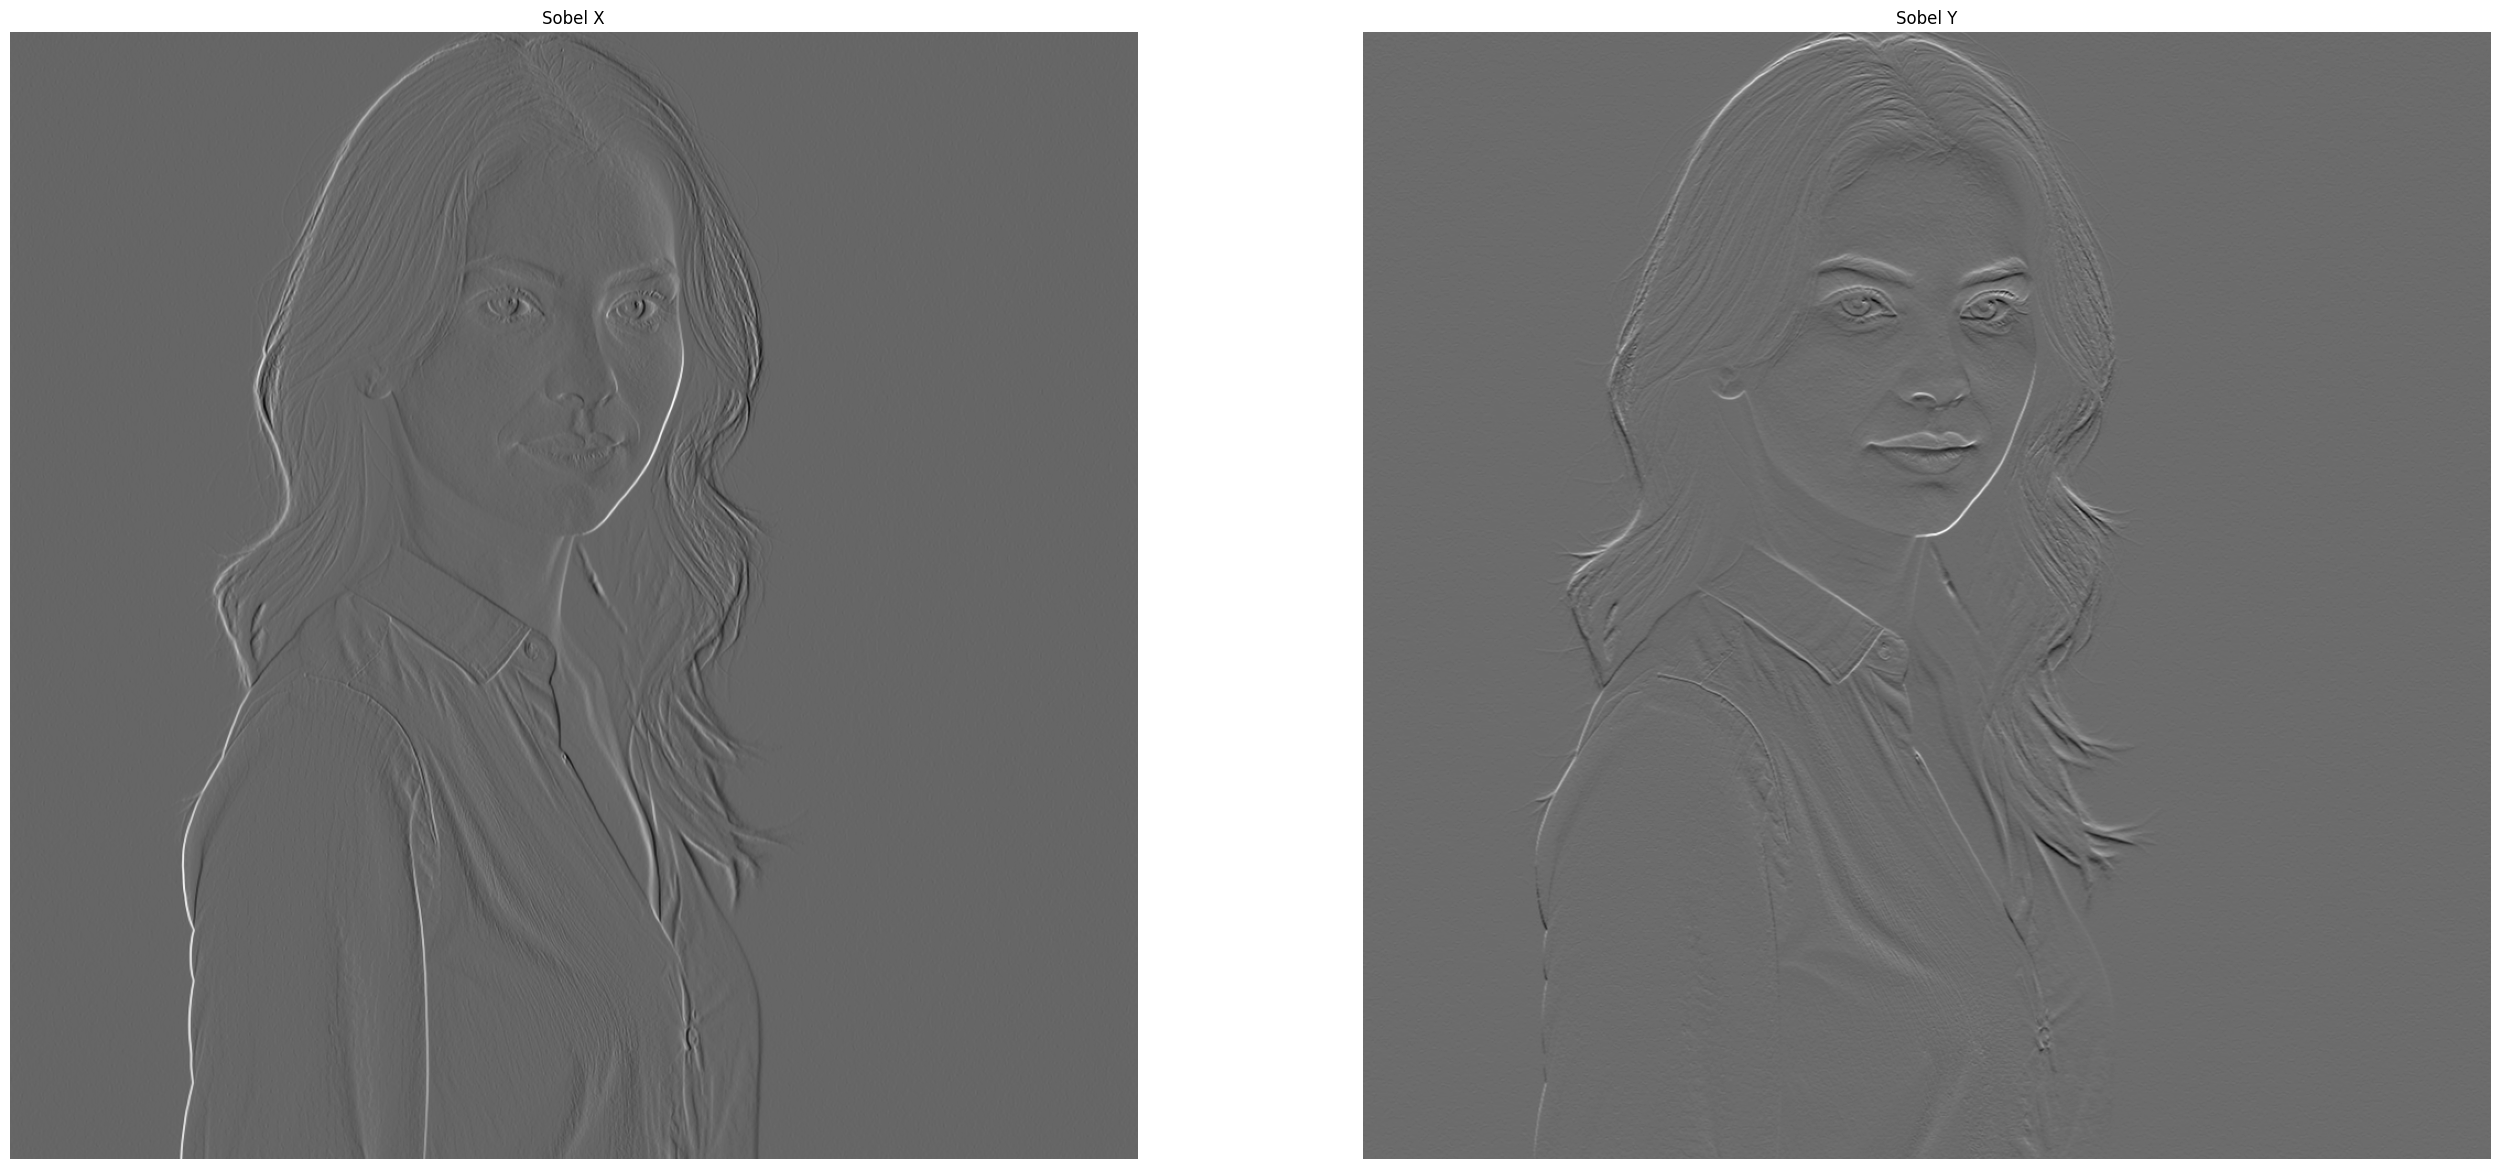

In [32]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

grad_x = convolve2d(image_gray, sobel_x, mode='same', boundary='symm')
grad_y = convolve2d(image_gray, sobel_y, mode='same', boundary='symm')

fig, axes = plt.subplots(1, 2, figsize=(32, 16)) 

#original image displaying
axes[0].imshow(grad_x, cmap='gray')
axes[0].set_title("Sobel X")
axes[0].axis('off')  

axes[1].imshow(grad_y, cmap='gray')
axes[1].set_title("Sobel Y")
axes[1].axis('off')  

# STEP 3 : Computing the gradient magnitude and show output

In this final step we will compute the gradient magnitude using the results from step 2. The formula is in **Sobel Filter** ref. After that, we will normalize the gradient magnitude as I explained before. Let's begin. 

(<matplotlib.image.AxesImage at 0x209402c16c0>,
 Text(0.5, 1.0, 'Gradient Magnitude'))

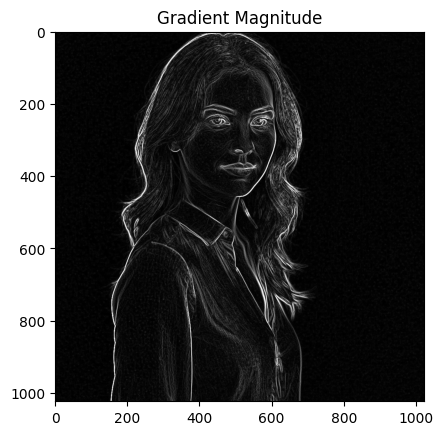

In [36]:
#formula available in reference
grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
#normalizong to 8-bit (0-255) for visualization
grad_magnitude = np.clip(grad_magnitude, 0, 255)
grad_magnitude=grad_magnitude.astype(np.uint8)

#displaying the result
plt.imshow(grad_magnitude, cmap='gray'),plt.title('Gradient Magnitude')


# **STEP 2bis : Using padded image & nested loops**

Let's implement what I explained in step 2 : Instead of using the convolve2d function from scipy, we will write everything by hand. We can implement padding using numpy, and to apply the convoluation, we will write nested loops to go through all the pixels in the padded image. Let's begin !

In [39]:
#used reflect mode so the edge pixels are mirrored (see ref. Padding Image Functions)
padded_image = np.pad(image_gray, pad_width=1, mode='reflect')

# #creating empty arrays to store the gradients
grad_x = np.zeros_like(image_gray, dtype=np.float64)  #x direction
grad_y = np.zeros_like(image_gray, dtype=np.float64)  #y direction

# STEP 3bis : Nested loops and convolution

(<matplotlib.image.AxesImage at 0x2094034df60>,
 Text(0.5, 1.0, 'Gradient Magnitude w/o SciPy'))

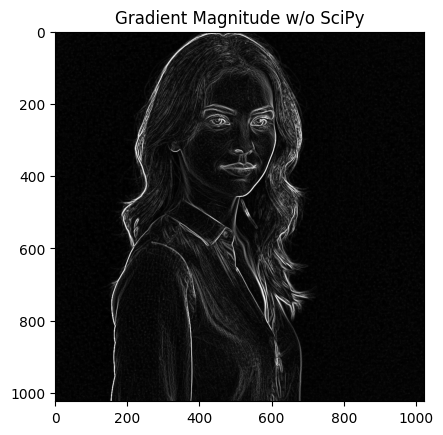

In [40]:
#image.shape[0] = rows/height and image.shape[1] = columns/width of the image, creating two loops nested to go through the whole image (all pixels)
for i in range(image_gray.shape[0]):
    for j in range(image_gray.shape[1]):
        #extracting the 3x3 region centered around the current pixel
        region = padded_image[i:i+3, j:j+3]
        
        #cumpting gradients using sobel kernels generated earlier, and saving in grad arrays
        grad_x[i, j] = np.sum(region * sobel_x)
        grad_y[i, j] = np.sum(region * sobel_y)

#same as in step 3
grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)

#normalize like in step 3
grad_magnitude = np.clip(grad_magnitude, 0, 255)

plt.imshow(grad_magnitude, cmap='gray'),plt.title('Gradient Magnitude w/o SciPy')



# **CONCLUSION**

We have implemented succesfully a Sobel filter with 2 different methods : with and without the use of SciPy. One thing to take into account is that the processing time without the convolve2d function took 16 seconds instead of 1.4s using the function. It is interesting to create our own function to customize it, or if we were looking for different result. We have more control when the libraries are not used. Still, it was really interesting to implement this Sobel filter, and we can see that the result on the output image is the same as using openCV. 

For questions, discussions, contact me : remifourcroy.pro@gmail.com. I am a recent computer vision graduate engineer from France and I would love to discuss ! If you have spotted any errors, bad explanations, don't hesitate to contact me ! 

**References** : 
- [Sobel Filter](https://en.wikipedia.org/wiki/Sobel_operator)
- [Padding Image Functions](https://numpy.org/devdocs/reference/generated/numpy.pad.html)